In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import streamlit as st

In [29]:
df = pd.read_excel('data.xlsx')
df

Store Name     Channel  Payment Type Country Sex Invoice Date  \
0     Store0031  Dark Store  Card Payment     USA   M   2023-04-12   
1     Store0031  Dark Store  Card Payment     USA   F   2023-05-13   
2     Store0031  Dark Store  Card Payment     USA   F   2023-05-13   
3     Store0031  Dark Store  Card Payment  Canada   M   2023-04-18   
4     Store0031  Dark Store  Card Payment      UK   M   2023-04-30   
...         ...         ...           ...     ...  ..          ...   
7477  Store1256  Dark Store  Card Payment     USA   M   2023-06-05   
7478  Store1256  Dark Store  Card Payment     USA   M   2023-06-07   
7479  Store1256  Dark Store  Card Payment     USA   M   2023-06-07   
7480  Store1256  Dark Store  Card Payment     USA   M   2023-06-07   
7481  Store1256  Dark Store  Card Payment     USA   M   2023-06-07   

      Product Barcode                                     Product Name  \
0            16231629   GARNIER BEAUTY HAIR&SKIN CARE Product 16231629   
1            15523551  CETAPHIL BEAUTY HAIR&SKIN CARE Product 15523551   
2            14346549   SEBAMED BEAUTY HAIR&SKIN CARE Product 14346549   
3            34684092  Beauty Time BEAUTY ACCESSORIES Product 34684092   
4            14238012      OLAY BEAUTY HAIR&SKIN CARE Product 14238012   
...               ...                                              ...   
7477         16464987   LABELLO BEAUTY HAIR&SKIN CARE Product 16464987   
7478         14118228    AVALON BEAUTY HAIR&SKIN CARE Product 14118228   
7479         15926511  CAUDALIE BEAUTY HAIR&SKIN CARE Product 15926511   
7480         15365817   FOLTENE BEAUTY HAIR&SKIN CARE Product 15365817   
7481         15365472   FOLTENE BEAUTY HAIR&SKIN CARE Product 15365472   

      Item Price Item Category   Item Brand Availability  Items per Ticket  \
0       116.34 $     Skin Care      GARNIER    Available                 1   
1       199.44 $     Skin Care     CETAPHIL    Available                 1   
2     126.5613 $     Skin Care      SEBAMED    Available                 1   
3        52.63 $   Accessories  Beauty Time    Available                 1   
4      63.2668 $     Skin Care         OLAY    Available                 1   
...          ...           ...          ...          ...               ...   
7477      83.1 $     Skin Care      LABELLO    Available                 1   
7478    182.82 $     Skin Care       AVALON    Available                 2   
7479    481.98 $     Skin Care     CAUDALIE  Unavailable                 1   
7480    271.46 $     Skin Care      FOLTENE    Available                 1   
7481    271.46 $     Skin Care      FOLTENE    Available                 1   

          City  
0      Georgia  
1      Georgia  
2      Georgia  
3      Georgia  
4      Georgia  
...        ...  
7477  Missouri  
7478  Missouri  
7479  Missouri  
7480  Missouri  
7481  Missouri  

[7482 rows x 14 columns]

In [30]:
df.shape

(7482, 14)

In [31]:
df.duplicated().sum()

0

In [32]:
df.isnull().sum()

Store Name          0
Channel             0
Payment Type        0
Country             0
Sex                 0
Invoice Date        0
Product Barcode     0
Product Name        0
Item Price          0
Item Category       0
Item Brand          0
Availability        0
Items per Ticket    0
City                0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store Name        7482 non-null   object        
 1   Channel           7482 non-null   object        
 2   Payment Type      7482 non-null   object        
 3   Country           7482 non-null   object        
 4   Sex               7482 non-null   object        
 5   Invoice Date      7482 non-null   datetime64[ns]
 6   Product Barcode   7482 non-null   int64         
 7   Product Name      7482 non-null   object        
 8   Item Price        7482 non-null   object        
 9   Item Category     7482 non-null   object        
 10  Item Brand        7482 non-null   object        
 11  Availability      7482 non-null   object        
 12  Items per Ticket  7482 non-null   int64         
 13  City              7482 non-null   object        
dtypes: datetime64[ns](1), in

In [34]:
df['Channel'].unique()


array(['Dark Store', 'Digital Store'], dtype=object)

In [35]:
df['Country'].unique()

array(['USA', 'Canada', 'UK'], dtype=object)

In [36]:
df['Sex'].unique()

array(['M', 'F', 'FML', 'Male', 'Female'], dtype=object)

In [37]:
def fun(x):
    if x.startswith('F'):
        x = "Female"
    else:
        x = "Male"
        
    return x
    

In [38]:
df['Sex'] = df['Sex'].apply(fun)

In [39]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
df['Price'] = df['Item Price'].apply(lambda x : x.split(' ')[0])

In [41]:
df['Currency'] = df['Item Price'].apply(lambda x : x.split(' ')[1])

In [42]:
df['Currency']

0       $
1       $
2       $
3       $
4       $
       ..
7477    $
7478    $
7479    $
7480    $
7481    $
Name: Currency, Length: 7482, dtype: object

In [43]:
df['Price']=df['Price'].astype('float')

In [44]:
df['Sales'] = df['Price'] * df['Items per Ticket']
df['Sales']

0       116.3400
1       199.4400
2       126.5613
3        52.6300
4        63.2668
          ...   
7477     83.1000
7478    365.6400
7479    481.9800
7480    271.4600
7481    271.4600
Name: Sales, Length: 7482, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store Name        7482 non-null   object        
 1   Channel           7482 non-null   object        
 2   Payment Type      7482 non-null   object        
 3   Country           7482 non-null   object        
 4   Sex               7482 non-null   object        
 5   Invoice Date      7482 non-null   datetime64[ns]
 6   Product Barcode   7482 non-null   int64         
 7   Product Name      7482 non-null   object        
 8   Item Price        7482 non-null   object        
 9   Item Category     7482 non-null   object        
 10  Item Brand        7482 non-null   object        
 11  Availability      7482 non-null   object        
 12  Items per Ticket  7482 non-null   int64         
 13  City              7482 non-null   object        
 14  Price             7482 n

In [46]:
df.drop(['Item Price'], axis = 1, inplace = True)

In [47]:
df['Price'].describe()

count    7482.000000
mean      144.749253
std       143.424283
min        16.730800
25%        48.198000
50%        90.025000
75%       204.453700
max      1842.050000
Name: Price, dtype: float64

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Price', ylabel='Density'>

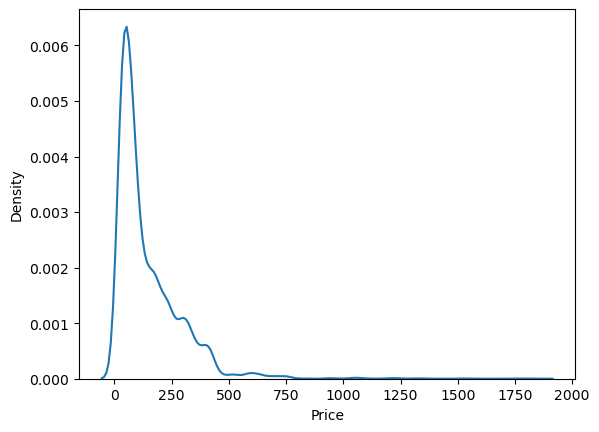

In [48]:
sns.kdeplot(df['Price'])

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Price', ylabel='Count'>

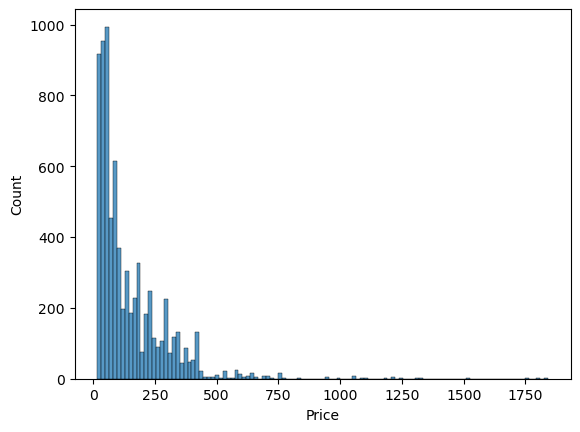

In [49]:
sns.histplot(df['Price'])

In [50]:
df.columns

Index(['Store Name', 'Channel', 'Payment Type', 'Country', 'Sex',
       'Invoice Date', 'Product Barcode', 'Product Name', 'Item Category',
       'Item Brand', 'Availability', 'Items per Ticket', 'City', 'Price',
       'Currency', 'Sales'],
      dtype='object')

In [51]:
px.histogram(df, x = 'City',text_auto = True)

In [52]:
px.pie(df,names='Sex', title = 'Gender Distribution',color = 'Sex', color_discrete_map={
    'Male': 'darkblue',
    'Female': 'pink'  
})

In [53]:
px.pie(
    df,
    names='Country',
    title='Country Distribution', color_discrete_map={
    'USA' : 'cornflowerblue',
    'UK' : 'deeppink',
        'Canada' : 'yellow'}
)


In [54]:
px.histogram(df, x = 'City', color = 'Sex', text_auto = True, color_discrete_map={
    'Male' : 'cornflowerblue',
    'Female' : 'deeppink'
}, title = 'City Gender Distribution')

In [55]:
px.pie(df,names='Sex', title = 'Gender Share for each City' , facet_col = 'City',
       facet_col_wrap=3, width=1000 ,height= 2000, facet_col_spacing=0.1, facet_row_spacing=0.02 )

In [113]:
px.histogram(df, x = 'City', color = 'Payment Type', text_auto = True, color_discrete_map={
    'card payment' : 'cornflowerblue',
    'cash payment' : 'deeppink'
},
            title = 'Payment Method over Cities')

In [57]:
px.pie(df,names='Payment Type', title = 'Paymenth Method for each City' , facet_col = 'City',
       facet_col_wrap=3, width=1000 ,height= 2000, facet_col_spacing=0.1, facet_row_spacing=0.02 )

In [58]:
df['Invoice Month'] = df['Invoice Date'].dt.month
px.pie(df, names= 'Invoice Month',title = 'Invoice Percentage per Month' )

In [59]:
px.pie(df,names='Payment Type', title = 'Payment Type Percentage for each Month' , facet_col = 'Invoice Month')

In [60]:
px.pie(df,names='Sex', title = 'Gender Share each Month' , facet_col = 'Invoice Month')

In [61]:
px.pie(df,names='Item Category', title = 'Item Category Percentage')

In [62]:
df['I.C'] = df['Item Category']
px.pie(df,names='Payment Type', title = 'Payment Type per Category Percentage' , facet_col = 'I.C')

In [105]:
px.pie(df,names='Sex', title = 'Gender share for each Item Category' , facet_col = 'I.C', color_discrete_map={
    'Male' : ['darkgray'],
    'Female' : ['salmon']
})

In [102]:
px.histogram(df, x = 'City', color = 'Item Category',text_auto = True,
            title = 'Item Category Over Cities',color_discrete_map={
                'Skin Care' : ['gray'],
                'Hair Care' : ['salmon'],
                'Accessories' : ['pink'],
                'Make Up' : ['deeppink'],
                'Hair Color' : ['darkgray'],
                'Beauty Devices' : ['red']
            })

In [99]:
px.histogram(data_frame=df, x='Payment Type', color='Sex', histfunc='count', barmode = 'group',text_auto = True, 
             title = 'Payment Type Gender distribution',color_discrete_sequence=['navy'])

In [98]:
px.histogram(df, x = 'Item Category', color = 'Items per Ticket', text_auto = True,
            title = 'Items per Ticket for each Category',color_discrete_sequence=['navy'])

In [67]:
df.columns

Index(['Store Name', 'Channel', 'Payment Type', 'Country', 'Sex',
       'Invoice Date', 'Product Barcode', 'Product Name', 'Item Category',
       'Item Brand', 'Availability', 'Items per Ticket', 'City', 'Price',
       'Currency', 'Sales', 'Invoice Month', 'I.C'],
      dtype='object')

In [97]:
city_sales_order = df.groupby('City')['Sales'].sum().sort_values(ascending=False).index.tolist()
px.histogram(df, x = 'City', y = 'Sales', category_orders={"City": city_sales_order},
             title = 'Total Sales for each City (sorted)',color_discrete_sequence=['navy'])

In [69]:
month_sales_df = df.groupby('Invoice Month')['Sales'].sum().reset_index()
px.line(month_sales_df, x = 'Invoice Month', y = 'Sales',
             title = 'Total Sales for each City')

In [96]:
ic_sales_df = df.groupby('I.C')['Sales'].sum().reset_index()
ic_sales_order = df.groupby('I.C')['Sales'].sum().sort_values(ascending=False).index.tolist()
px.histogram(ic_sales_df, x = 'I.C', y = 'Sales',category_orders={"I.C": ic_sales_order},
             title = 'Total Sales for each Item Category',color_discrete_sequence=['navy'])

In [95]:
store_sales_order = df.groupby('Store Name')['Sales'].sum().nlargest(5).index.tolist()
top_5_stores = df[df['Store Name'].isin(store_sales_order)]
px.histogram(top_5_stores, x = 'Store Name', y = 'Sales', category_orders={"Store Name": store_sales_order},
             title = 'Top Five Stores in Sales (sorted)',color_discrete_sequence=['navy'])

In [94]:
px.histogram(df, x = 'Channel', y = 'Sales',color_discrete_sequence=['navy'])

In [93]:
pn_sales_order = df.groupby('Product Name')['Sales'].sum().nlargest(5).index.tolist()
top_5_pns = df[df['Product Name'].isin(pn_sales_order)]
px.histogram(top_5_pns, x = 'Product Name', y = 'Sales', category_orders={"Product Name": pn_sales_order},
             title = 'Top Five Products in Sales (sorted)',color_discrete_sequence=['navy'])